<a href="https://colab.research.google.com/github/yasash2/DeeplearningCIFAR10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
## Reshaping 
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
classes = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse','ship','truck']

In [6]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    
    plt.xlabel(classes[y[index]])
    plt.show()
    

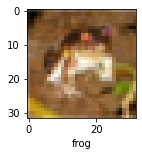

In [7]:
plot_sample(X_train,y_train,0)

In [8]:
## normalize values of an image
## To do that, divide it by 255, as each image has pixels ranging from 0 to 255 only
## we get an output between 0 and 1 
X_train = X_train / 255
X_test = X_test / 255



In [9]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.8145 - accuracy: 0.3499
Epoch 2/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.6243 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5422 - accuracy: 0.4546
Epoch 4/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4818 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4313 - accuracy: 0.4965


In [11]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.4528 - accuracy: 0.4801


[1.452837586402893, 0.48010000586509705]

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report\n', classification_report(y_test, y_pred_classes))

classification report
               precision    recall  f1-score   support

           0       0.61      0.48      0.53      1000
           1       0.52      0.67      0.59      1000
           2       0.36      0.44      0.39      1000
           3       0.31      0.49      0.38      1000
           4       0.51      0.31      0.38      1000
           5       0.48      0.23      0.31      1000
           6       0.57      0.47      0.52      1000
           7       0.62      0.49      0.55      1000
           8       0.51      0.71      0.59      1000
           9       0.50      0.53      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [17]:
cnn = models.Sequential([
  layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
  layers.MaxPooling2D((2,2)),

  layers.Flatten(),
  layers.Dense(64,activation = 'relu'),
  layers.Dense(10,activation = 'softmax'),

                         
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4495 - accuracy: 0.4808
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1082 - accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9813 - accuracy: 0.6581
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9024 - accuracy: 0.6870
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8355 - accuracy: 0.7107
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7821 - accuracy: 0.7294
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7293 - accuracy: 0.7449
Epoch 8/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6871 - accuracy: 0.7604
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6439 - accuracy: 0.7752
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9655 - accuracy: 0.6944


[0.9655481576919556, 0.6944000124931335]

In [19]:
## reshape test models as well
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

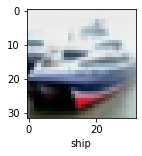

In [20]:
plot_sample(X_test,y_test,1)

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.25795689e-03, 1.68688239e-05, 2.12624072e-04, 9.57655609e-01,
        2.08220351e-03, 3.52411047e-02, 9.15498764e-04, 6.63626997e-05,
        1.51562283e-03, 3.62251667e-05],
       [1.49716213e-02, 4.31577027e-01, 1.51804079e-05, 5.19677178e-06,
        4.07635252e-06, 1.88196026e-07, 3.35198251e-07, 1.86547240e-07,
        5.23966193e-01, 2.94599477e-02],
       [2.25043476e-01, 2.77361363e-01, 4.79156093e-04, 1.46028716e-02,
        1.11533422e-02, 2.46769935e-03, 5.47198579e-03, 4.31664102e-03,
        3.44437808e-01, 1.14665680e-01],
       [9.92634237e-01, 2.87720328e-03, 1.04441587e-03, 3.02428845e-04,
        1.35322800e-04, 1.61292846e-05, 4.95235960e-04, 7.06005721e-06,
        1.06949103e-03, 1.41843117e-03],
       [2.11013642e-07, 2.09945091e-03, 3.05298343e-03, 1.24908425e-01,
        6.08365059e-01, 2.26480700e-03, 2.59260952e-01, 1.95594612e-06,
        2.66208499e-05, 1.95929078e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
print('classification report\n', classification_report(y_test, y_classes))

classification report
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.79      0.83      0.81      1000
           2       0.71      0.45      0.55      1000
           3       0.50      0.56      0.53      1000
           4       0.62      0.68      0.65      1000
           5       0.67      0.53      0.59      1000
           6       0.66      0.83      0.74      1000
           7       0.69      0.77      0.73      1000
           8       0.85      0.77      0.80      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

